## Simple Linear Regression price vs bedrooms

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dataset = pd.read_excel("D:\\ML\\dataset\\Linear Regression.xlsx")

In [5]:
dataset.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


In [6]:
df = dataset.drop(columns=['sqft_living','bathrooms','floors'])

In [7]:
df.head()

,price,bedrooms
0,221900,3
1,538000,3
2,180000,2
3,604000,4
4,510000,3


In [8]:
df.dtypes

price       int64
bedrooms    int64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   price     21613 non-null  int64
 1   bedrooms  21613 non-null  int64
dtypes: int64(2)
memory usage: 337.8 KB


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,21613.0,540088.141905,367127.195968,75000.0,321950.0,450000.0,645000.0,7700000.0
bedrooms,21613.0,3.370842,0.930062,0.0,3.0,3.0,4.0,33.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018D3C8B6C48>,
      dtype=object)

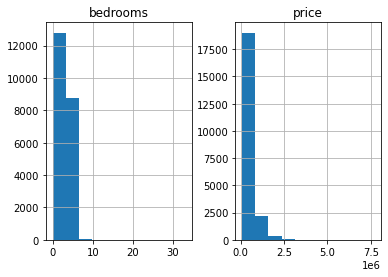

In [12]:
df.hist()

In [13]:
df.corr()

,price,bedrooms
price,1.00000,0.30835
bedrooms,0.30835,1.00000


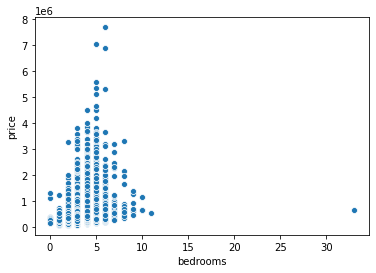

In [15]:
sns.scatterplot(df['bedrooms'],df['price'])

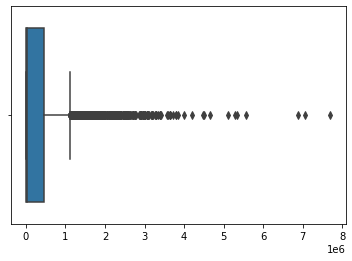

In [16]:
sns.boxplot(df)

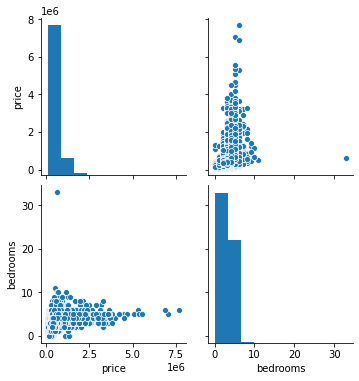

In [17]:
sns.pairplot(df)

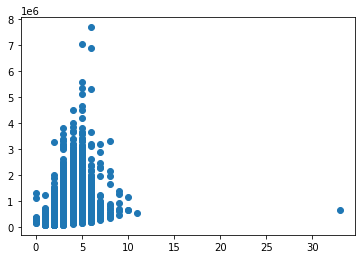

In [18]:
X = df.iloc[:,1:]
y = df.iloc[:,:-1]
plt.scatter(X,y)
plt.show()

In [19]:
X.head()

,bedrooms
0,3
1,3
2,2
3,4
4,3


In [20]:
y.head()

,price
0,221900
1,538000
2,180000
3,604000
4,510000


In [57]:
from sklearn.model_selection import train_test_split    # split data set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [58]:
from sklearn.linear_model import LinearRegression   # use linear regression model

In [59]:
linear =LinearRegression()

In [60]:
linear.fit(X_train,y_train)   # train the model

LinearRegression()

In [61]:
linear.coef_    # Slop values M values

array([[123535.45915908]])

In [62]:
linear.intercept_   # Constant C Values

array([126751.84604781])

In [63]:
y_pred = linear.predict(X_test)    # test the model

In [64]:
y_pred

array([[373822.76436597],
       [620893.68268414],
       [373822.76436597],
       ...,
       [497358.22352506],
       [497358.22352506],
       [497358.22352506]])

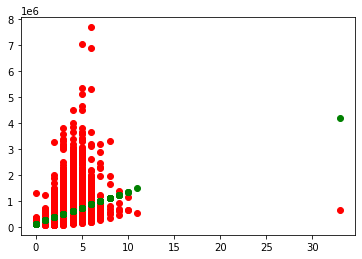

In [65]:
plt.scatter(X_train,y_train,color='red')    # training set scatter plot
plt.scatter(X_train,linear.predict(X_train),color = 'green')
plt.show()

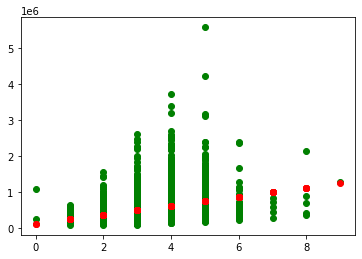

In [66]:
plt.scatter(X_test,y_test,color='green')   # test set scatter plot
plt.scatter(X_test,linear.predict(X_test),color='red')
plt.show()

## Estimate Cost 

In [67]:
from sklearn.metrics import mean_squared_error,r2_score

In [68]:
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
r_square = r2_score(y_test,y_pred)
print("RMSE Values:",RMSE)
print("R2 square:",r_square)

RMSE Values: 330690.0478733202
R2 square: 0.08045757572566958


## Unseen value prediction

In [69]:
unseen_pred = linear.predict(np.array([[1]]))
print("prediction values:",unseen_pred)

prediction values: [[250287.30520689]]


In [70]:
df.head()

,price,bedrooms
0,221900,3
1,538000,3
2,180000,2
3,604000,4
4,510000,3
